In [1]:
import os
import sys

sys.path.append('..')

In [2]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from PIL import Image

In [3]:
%matplotlib inline

In [4]:
DATA_ROOT = '../data/cityscapes/gtProc'
print(os.path.exists(DATA_ROOT))

True


In [12]:
split = 'train'
city = 'aachen'
trainIds_name = 'aachen_000173_000019_gtFine_trainIds.png'
edge_name = 'aachen_000173_000019_gtProc_edge.png'
split = 'train'
city = 'aachen'
trainIds_name = 'aachen_000172_000019_gtFine_trainIds.png'
edge_name = 'aachen_000172_000019_gtProc_edge.png'

In [13]:
trainIds_path = os.path.join(DATA_ROOT, split, city, trainIds_name)
edge_path = os.path.join(DATA_ROOT, split, city, edge_name)

assert os.path.exists(trainIds_path)
assert os.path.exists(edge_path)

In [14]:
GT_ROOT = '../data/cityscapes/gtFine'
labelIds_name = 'aachen_000172_000019_gtFine_labelIds.png'

In [15]:
labelIds_path = os.path.join(GT_ROOT, split, city, labelIds_name)
assert os.path.exists(labelIds_path)

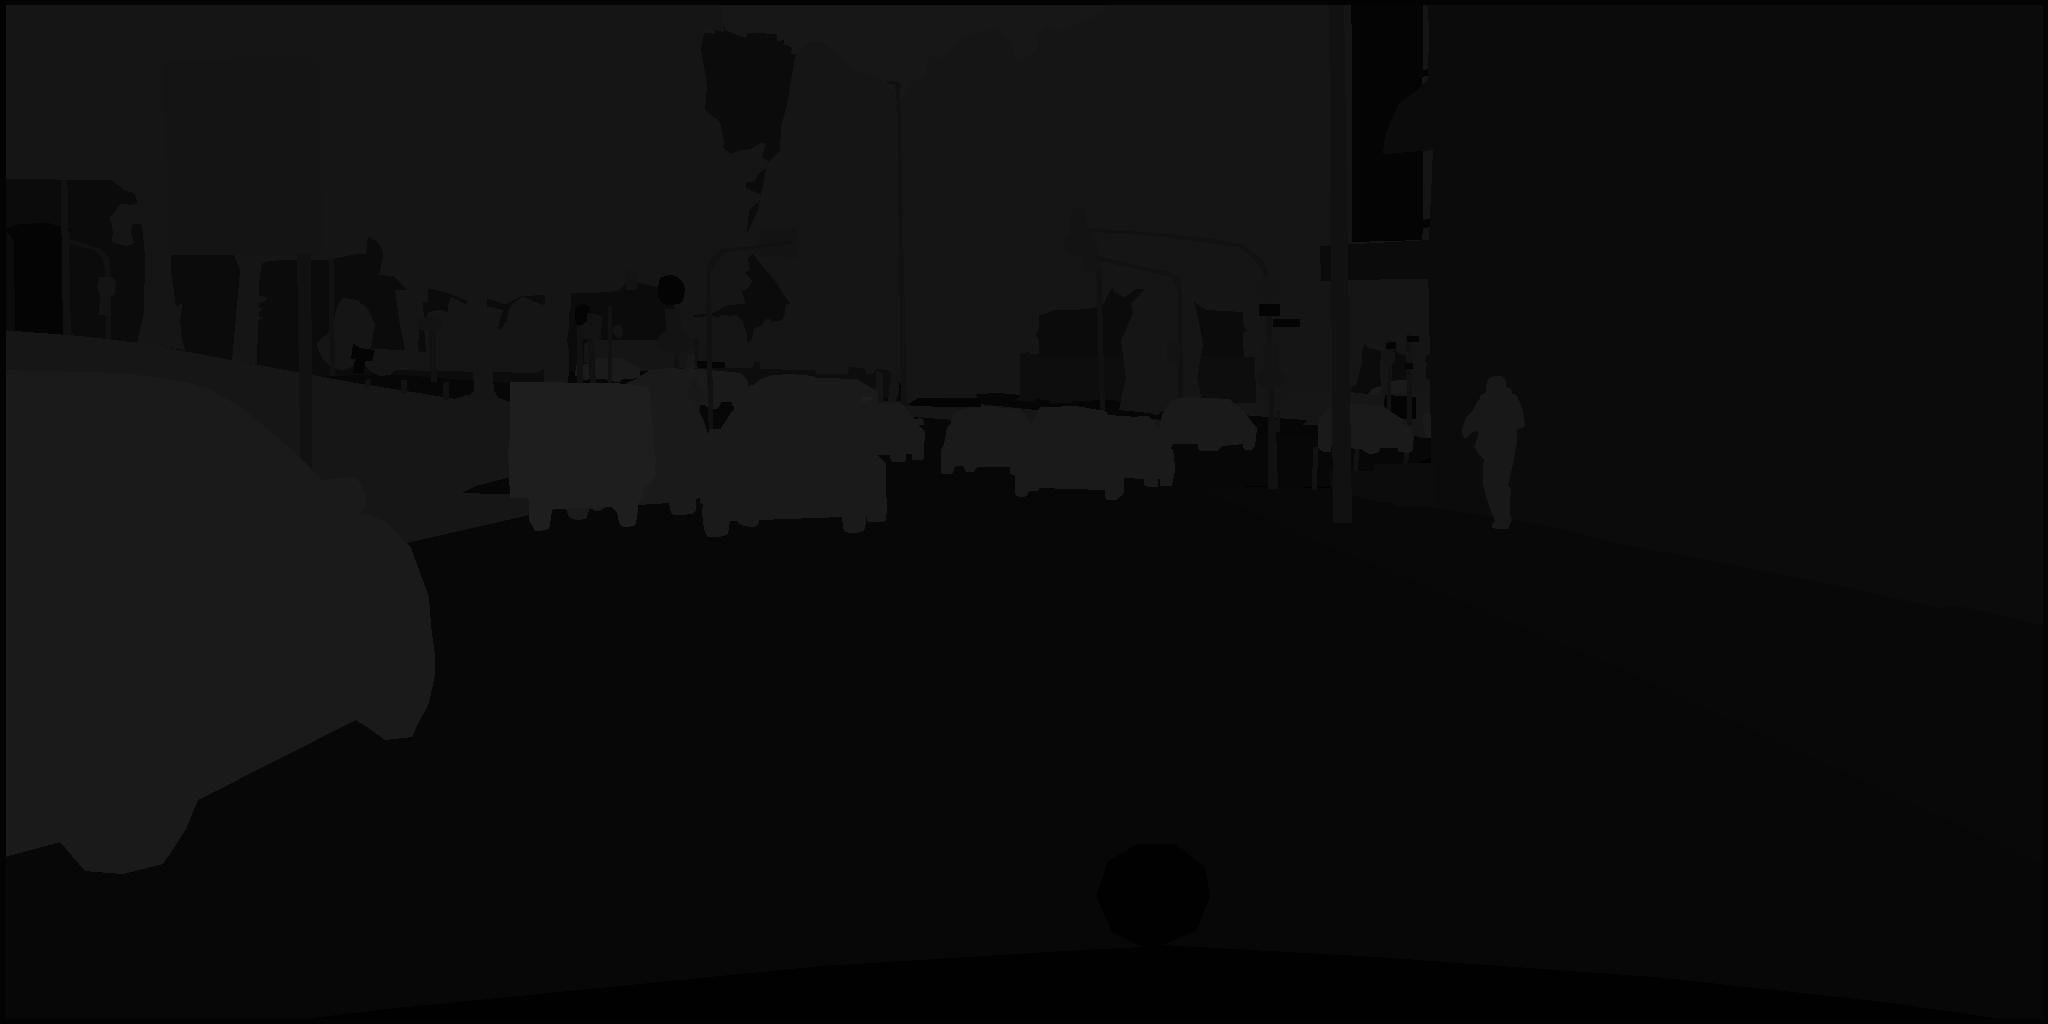

In [16]:
labelIds_img = Image.open(labelIds_path)
display(labelIds_img)

In [17]:
from pyEdgeEval.datasets.cityscapes.labels import convert_label2trainId

In [18]:
_trainIds = convert_label2trainId(np.array(labelIds_img))

In [19]:
for i in range(19):
    print(i, np.any(_trainIds == i))

0 True
1 True
2 True
3 True
4 True
5 True
6 True
7 True
8 True
9 True
10 True
11 True
12 False
13 True
14 False
15 False
16 False
17 True
18 False


<PIL.PngImagePlugin.PngImageFile image mode=L size=2048x1024 at 0x7F1954123BB0>


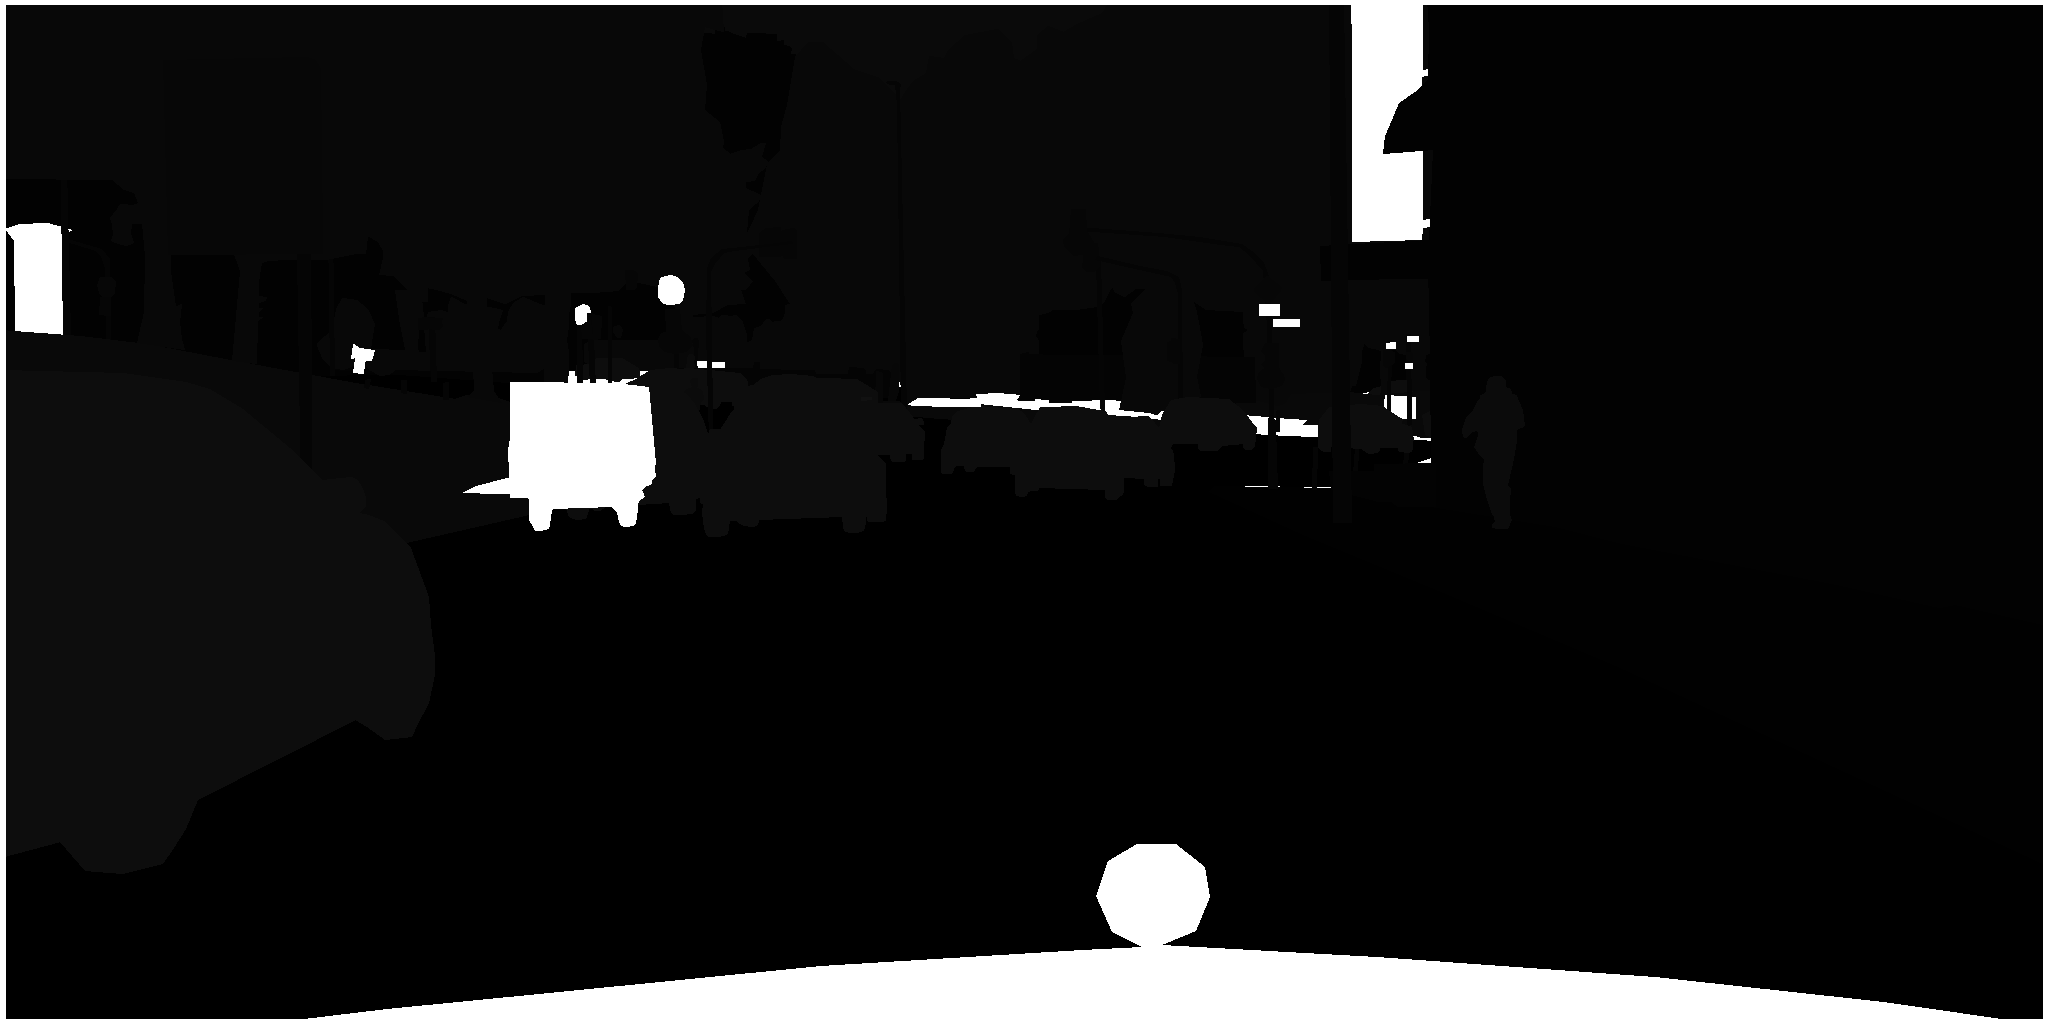

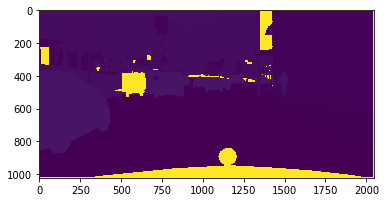

In [20]:
trainIds_img = Image.open(trainIds_path)
print(trainIds_img)
trainIds = np.array(trainIds_img)
display(trainIds_img)
plt.imshow(trainIds, interpolation='nearest')

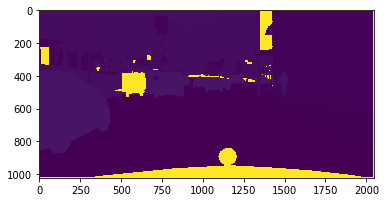

In [21]:
plt.imshow(_trainIds, interpolation='nearest')  # check

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=2048x1024 at 0x7F18ECAFB520>


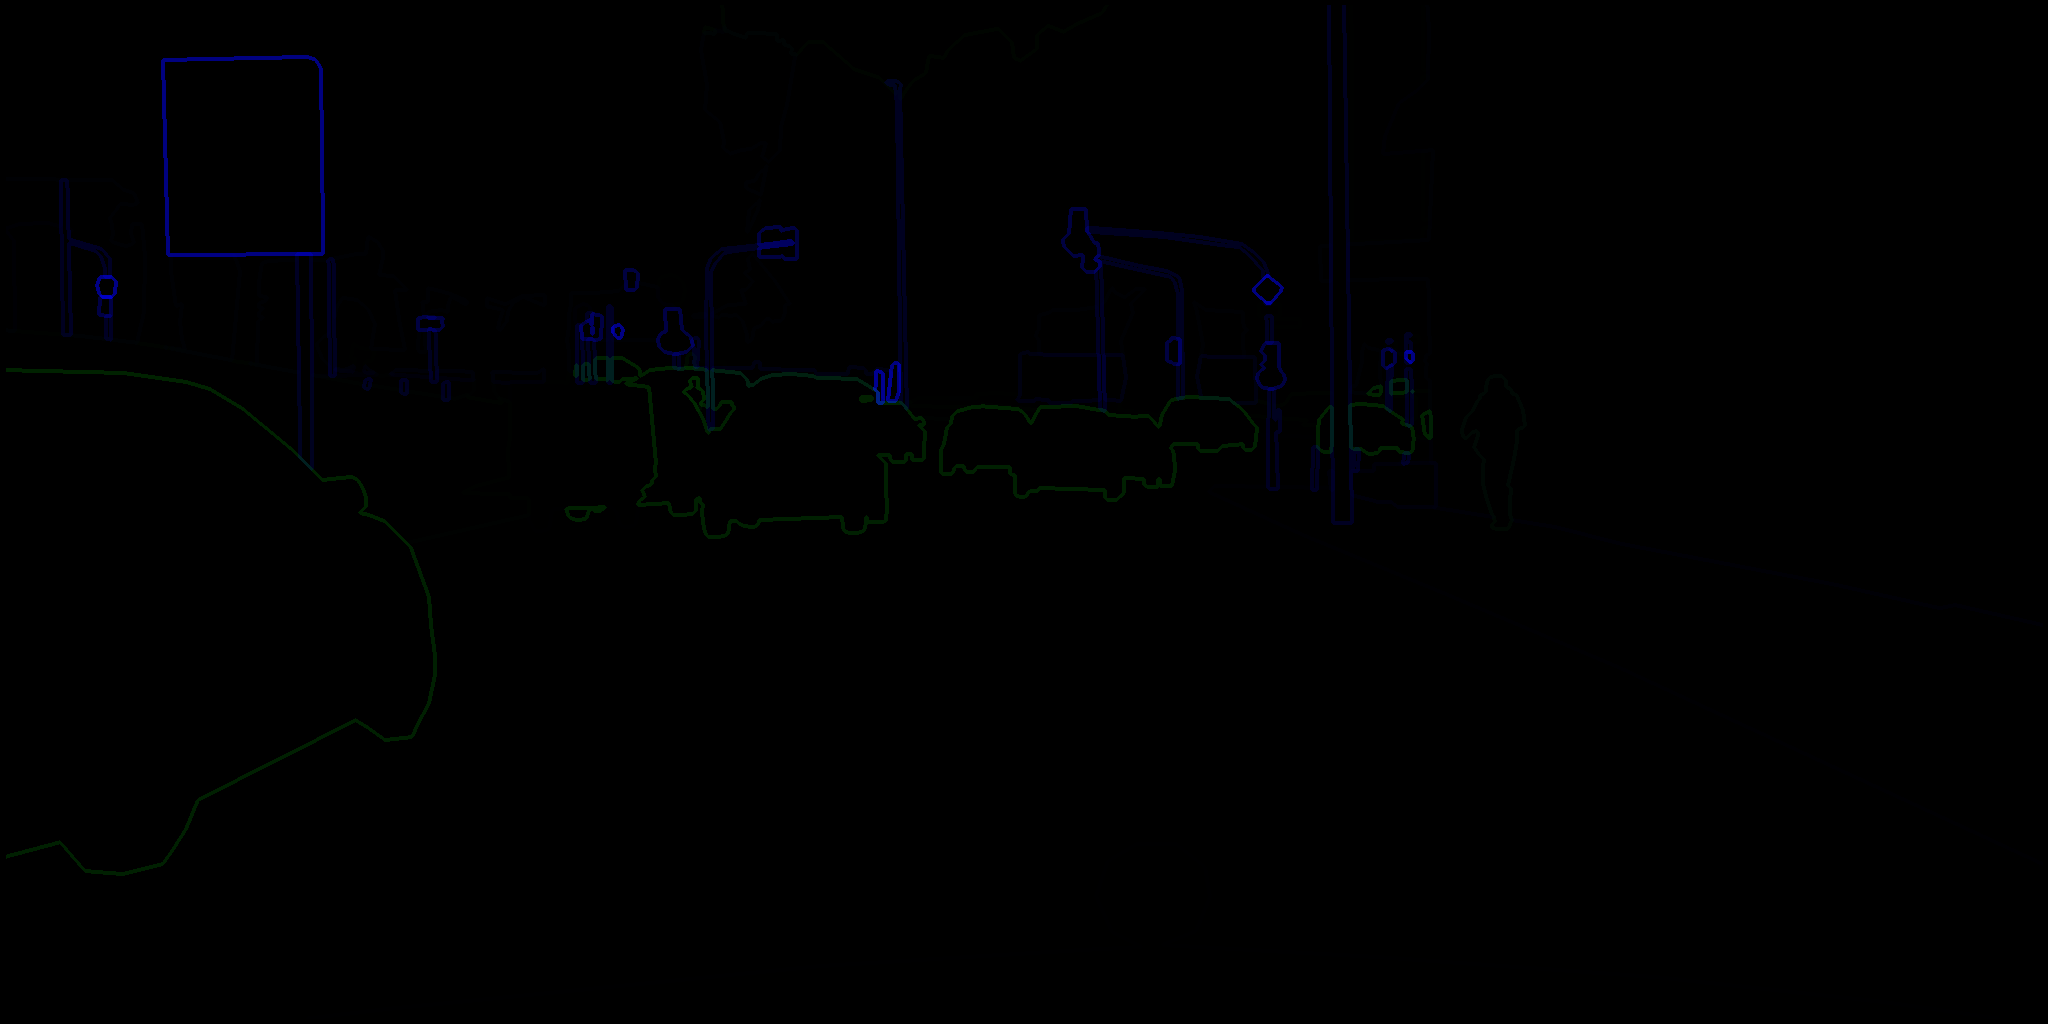

In [22]:
edge_img = Image.open(edge_path)
print(edge_img)
display(edge_img)

In [29]:
from pyEdgeEval.datasets.cityscapes.edge_encoding import rgb_decoding

In [30]:
edge = rgb_decoding(edge_path, num_trainIds=19, scale=1.0, is_png=True)

In [32]:
edge.shape

(19, 1024, 2048)

In [49]:
_, h, w = edge.shape

out = np.ones((h, w), dtype=np.uint8) * 255

print(out.shape)

for i in range(h):
    for j in range(w):
        cat = edge[:, i, j]
        
        if sum(cat) < 1:
            continue
            
        out[i][j] = (np.argmax(cat) / 19 * 255).astype(np.uint8)

rounded = out
# rounded = np.argmax(_edge, axis=-1)
# rounded = (rounded / 18) * 255
# rounded = rounded.astype(np.uint8)
# print(rounded.shape)
# print(rounded.dtype)

(1024, 2048)


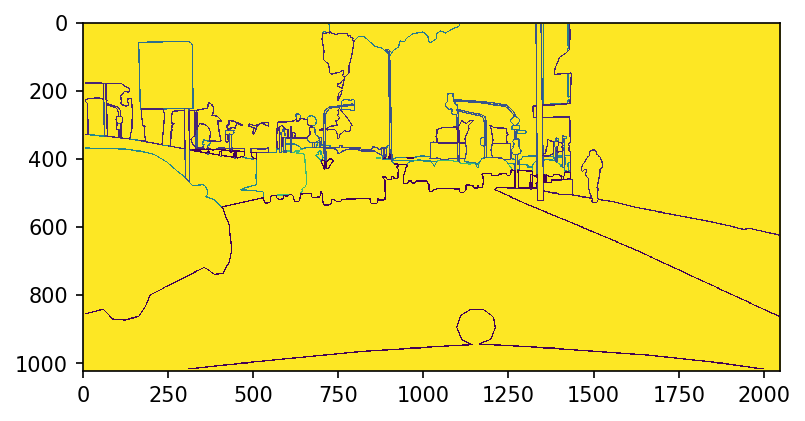

In [50]:
plt.imshow(rounded, interpolation='nearest')
plt.gcf().set_dpi(150)

In [35]:
def multilabel_to_binary_edges(edges: np.ndarray) -> np.ndarray:
    return (np.sum(edges, axis=0) > 0).astype(np.uint8)

all_edge = multilabel_to_binary_edges(edge)

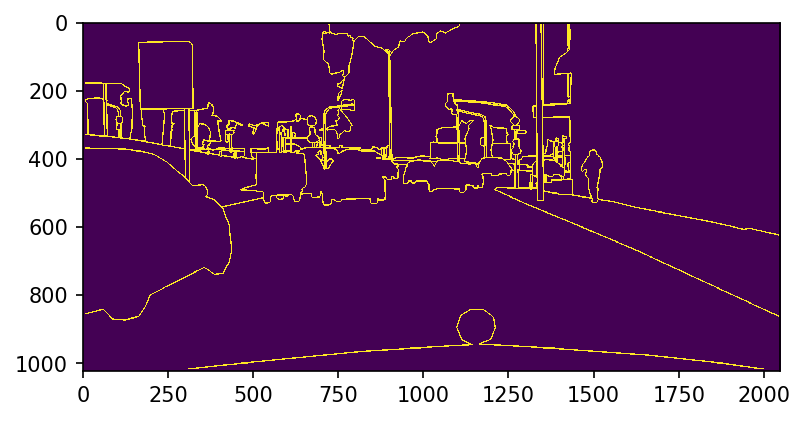

In [71]:
plt.imshow(all_edge, interpolation='nearest')
plt.gcf().set_dpi(150)

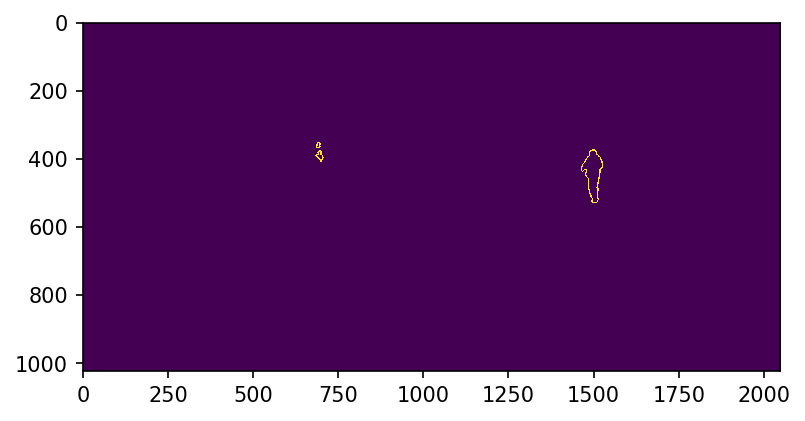

In [42]:
_id = 11
class_edge = edge[_id, ...]
plt.imshow(class_edge, interpolation='nearest')
plt.gcf().set_dpi(150)

# Check against GT edges (binary file)

In [52]:
GT_EDGES_ROOT = os.path.join('/', 'home', 'ubuntu', 'dataset', 'edge', 'cityscapes-preprocess', 'data_proc', 'gtFine')
assert os.path.exists(GT_EDGES_ROOT), GT_EDGES_ROOT

In [53]:
bin_name = 'aachen_000172_000019_gtFine_edge.bin'
bin_edge_path = os.path.join(GT_EDGES_ROOT, split, city, bin_name)
assert os.path.exists(bin_edge_path), bin_edge_path

In [56]:
from pyEdgeEval.datasets.cityscapes.edge_encoding import binary_decoding

In [58]:
bin_edge = binary_decoding(bin_edge_path, 1024, 2048, 19)

In [62]:
np.array_equal(bin_edge, edge)

True

In [75]:
gt_bin_edge = np.fromfile(bin_edge_path, dtype=np.uint32).reshape(1024, 2048).astype(bool).astype(np.uint8)

In [76]:
np.array_equal(gt_bin_edge, all_edge)

True

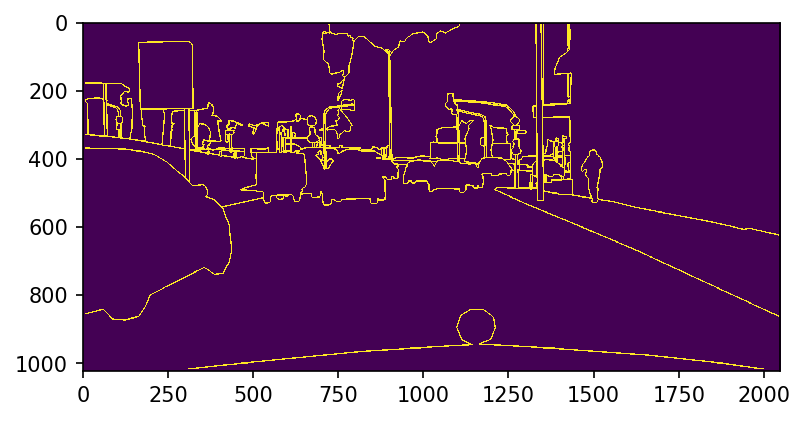

In [77]:
plt.imshow(gt_bin_edge, interpolation='nearest')
plt.gcf().set_dpi(150)